# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

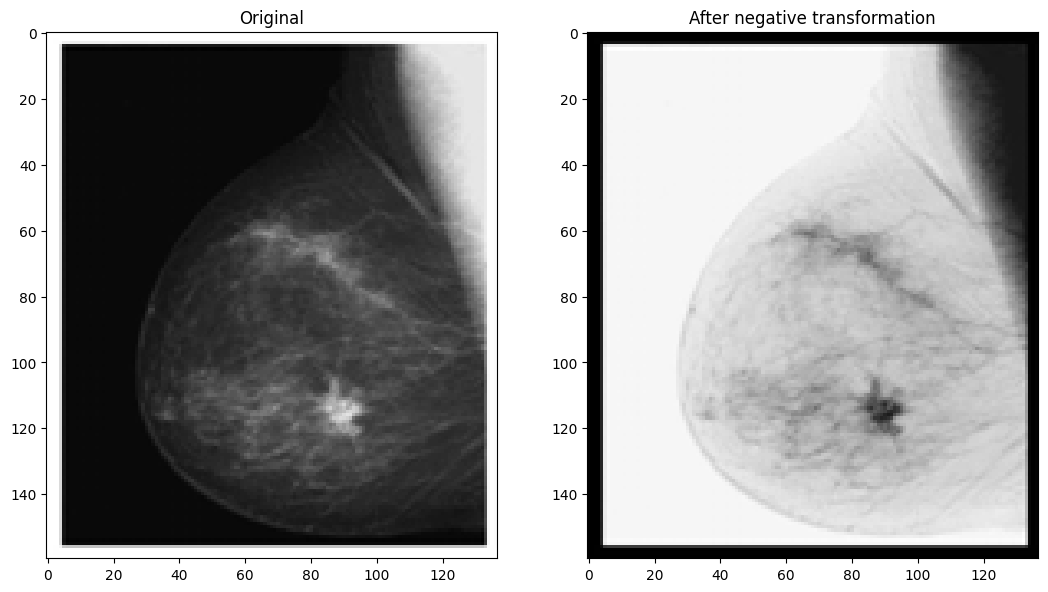

In [9]:
'''
1
Negative Transformation
'''
def negative(img):
	imgCopy = img / img.max()
	return 1 - imgCopy


img1 = io.imread("./imgs/Picture1.png", as_gray=True)
img1After = negative(img1)

show_images([img1, img1After], ["Original", "After negative transformation"])



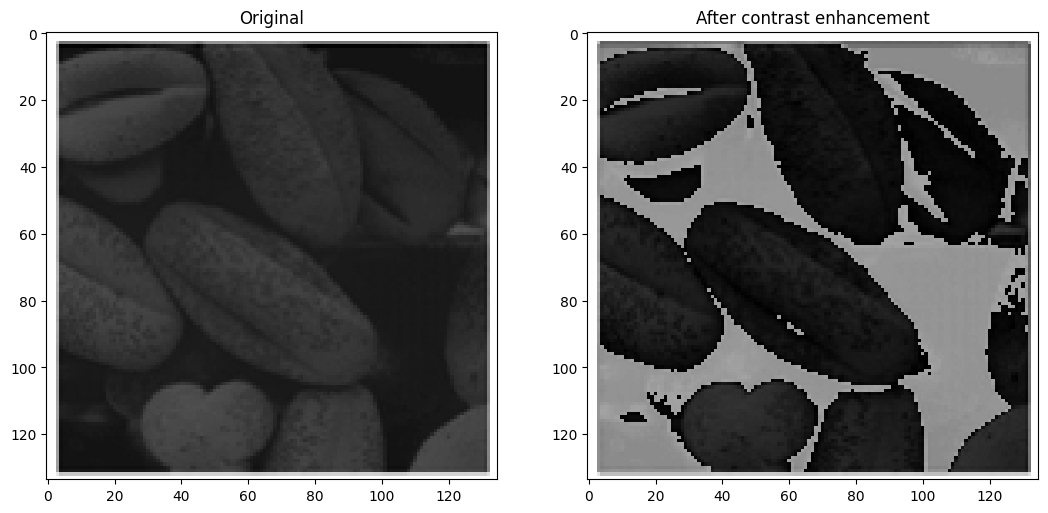

In [14]:
'''
2
Contrast Enhancement
'''
# using for loops and if statements

# def contrastEnhancement(img):
# 	newimg = np.copy(img)
# 	height = img.shape[0]
# 	width = img.shape[1]
# 	for i in range(height):
# 			for j in range(width):
# 					if(img[i][j] * 255 >= 0 and img[i][j] * 255 <= 100):
# 							newimg[i][j] = (((3/2) * (img[i][j] * 255)) + 50)/255
# 	return newimg

def contrastEnhancement(img):
	imgCopy = 255 * (img / img.max())
	imgCopy[np.logical_and(imgCopy >= 0, imgCopy <= 100)] = 1.5 * imgCopy[np.logical_and(imgCopy >= 0, imgCopy <= 100)] + 50
	return imgCopy


img2 = io.imread("./imgs/Picture2.png", as_gray=True)
img2After = contrastEnhancement(img2)

show_images([img2, img2After], ["Original", "After contrast enhancement"])


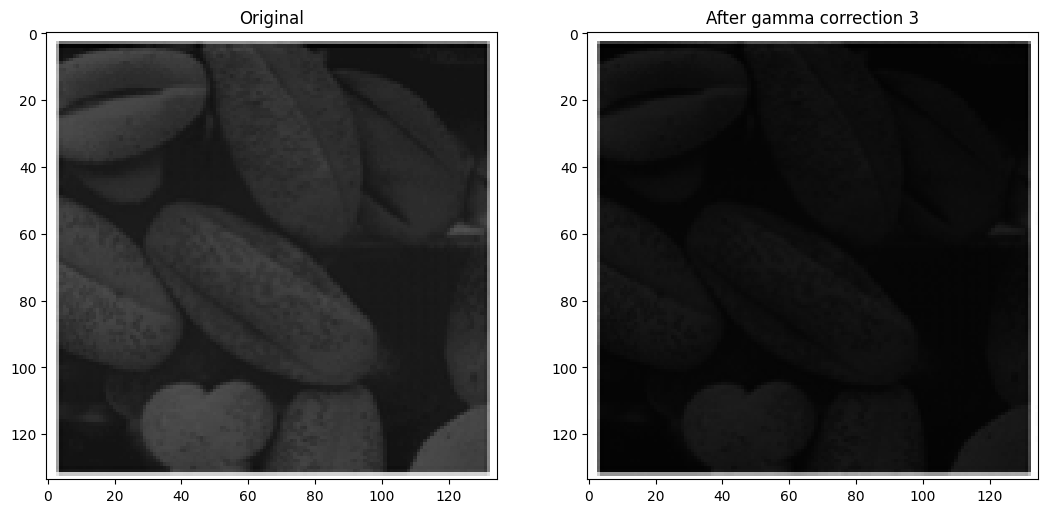

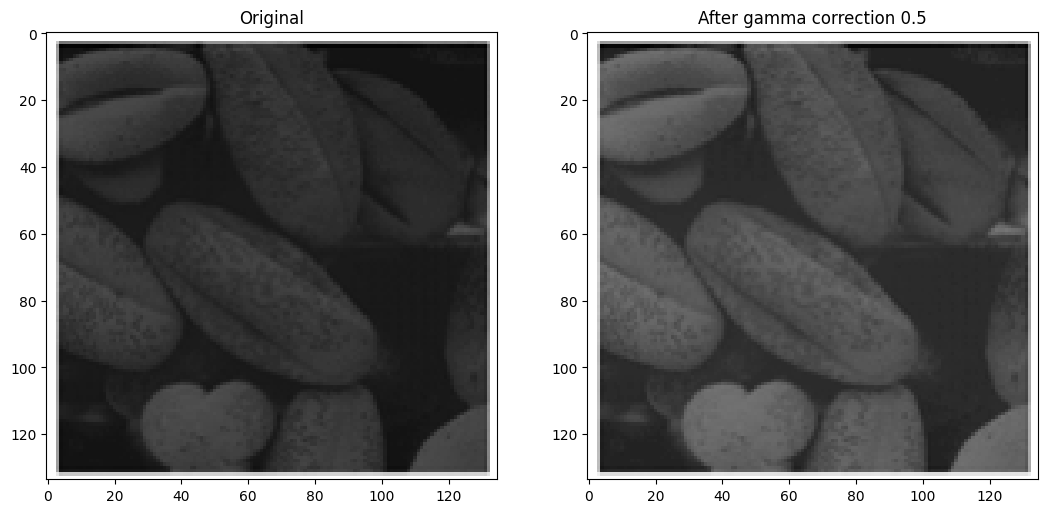

In [15]:
'''
3
Gamma Correction
'''
def gammaCorrection(img, c, segma):
	return c * ((img / img.max())**segma)

img3 = io.imread("./imgs/Picture2.png", as_gray=True)
img3After1 = gammaCorrection(img3, 1, 3)
img3After2 = gammaCorrection(img3, 1, 0.01)

# scale from 0 -> 1
show_images([img3, img3After1], ["Original", "After gamma correction 3"])
show_images([img3, img3After2], ["Original", "After gamma correction 0.5"])



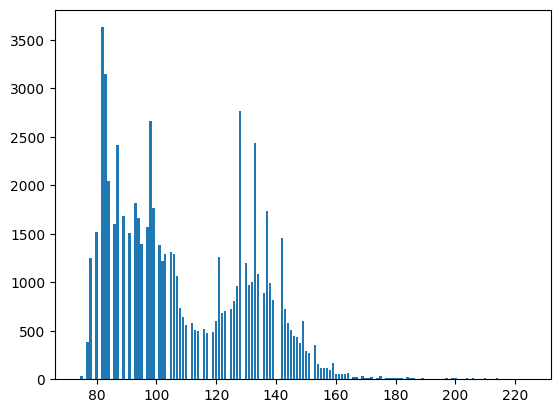

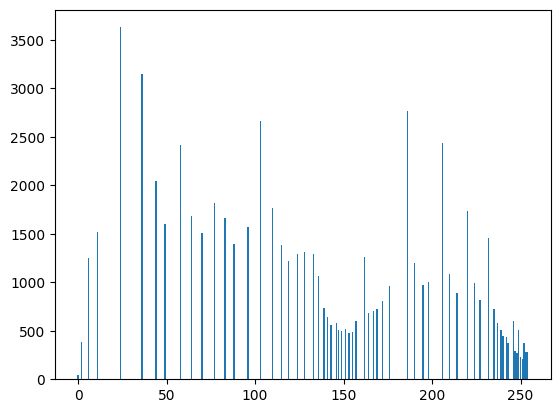

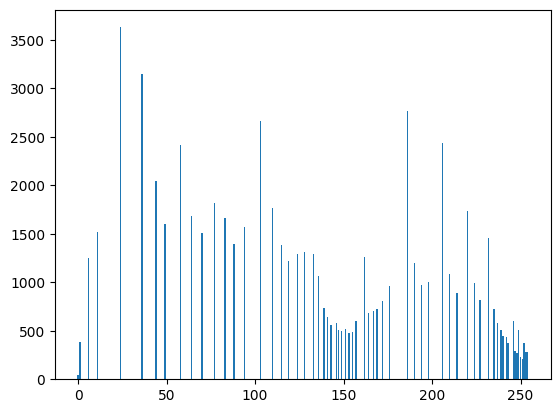

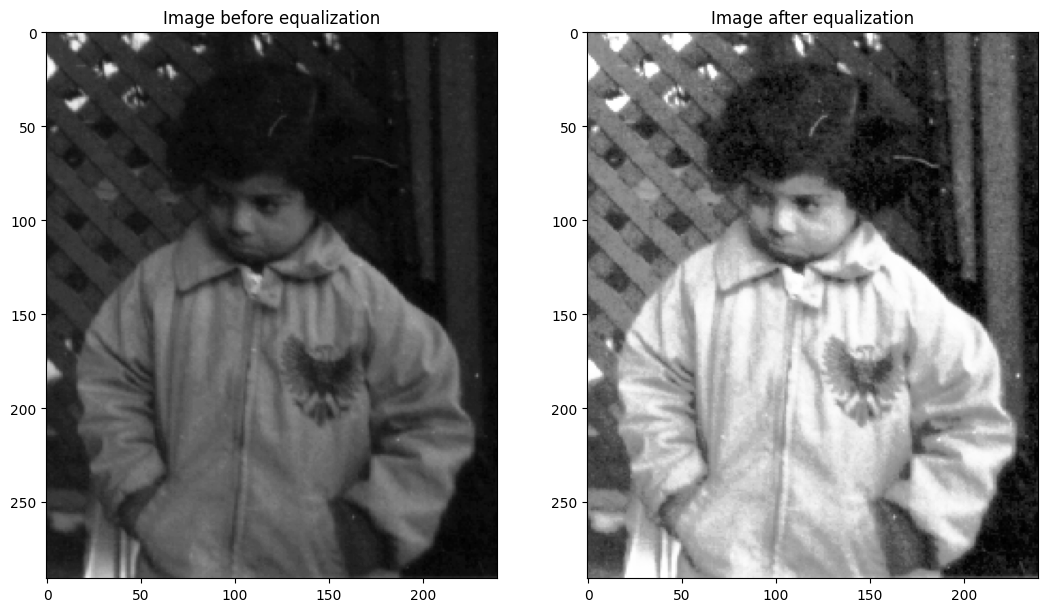

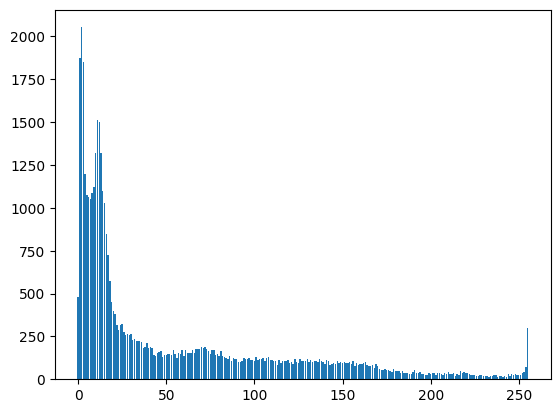

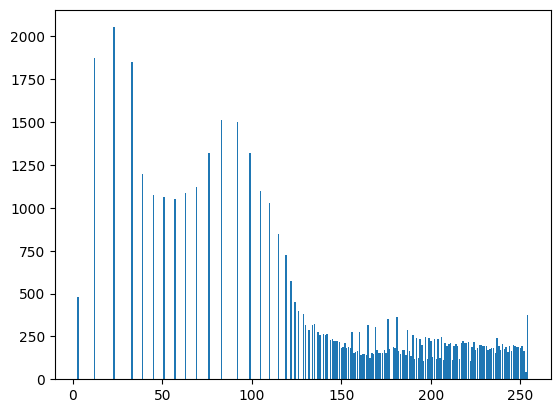

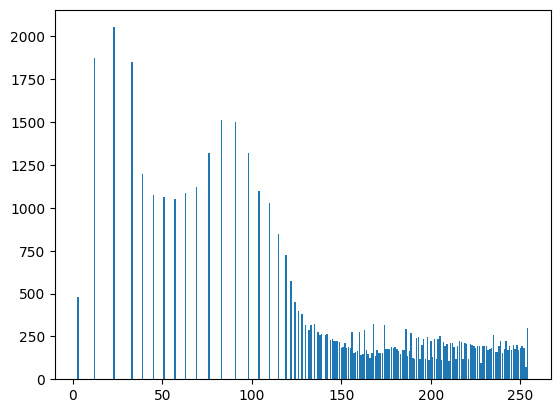

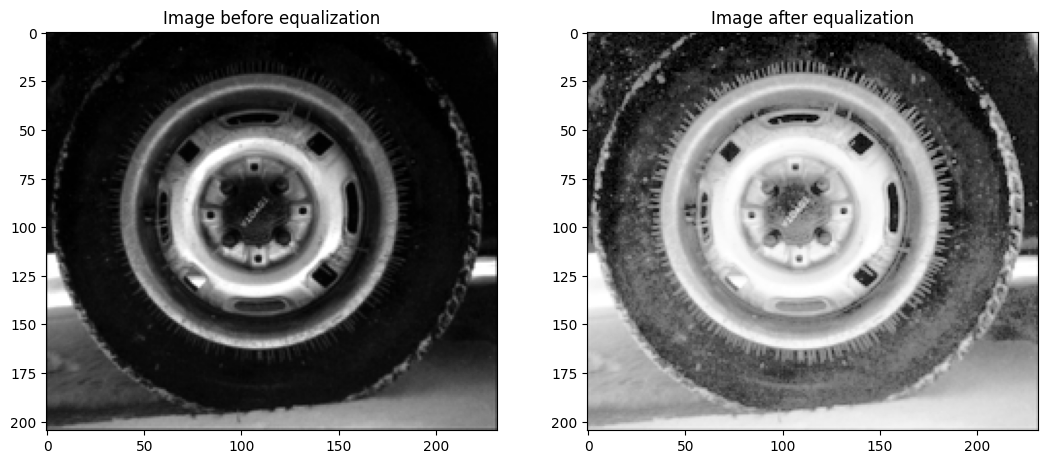

In [6]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(img, nbins=256):
	# Get the histogram of the original image
	hist, bins = np.histogram(img.flatten(), bins=nbins)
	# Form the cumulative image histogram
	Hc = hist.cumsum()
	# Set the mapping
	q = 255 * (Hc / Hc[-1])
	# Use the mapping to create the new image
	newImage = np.interp(img, bins[:-1], q)
	return newImage


img4 = io.imread("./imgs/pout.tif", as_gray=True)
img4After = getImageWithHist(img4)
showHist(img4)
showHist(img4After)
showHist(equalize_hist(img4) * 255)
show_images([img4, img4After], ["Image before equalization", "Image after equalization"])

img5 = io.imread("./imgs/tire.tif", as_gray=True)
img5After = getImageWithHist(img5)
showHist(img5)
showHist(img5After)
showHist(equalize_hist(img5) * 255)
show_images([img5, img5After], ["Image before equalization", "Image after equalization"])



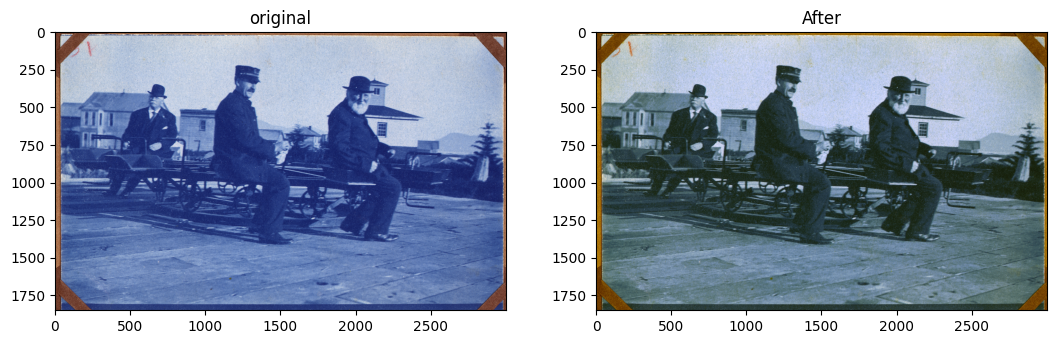

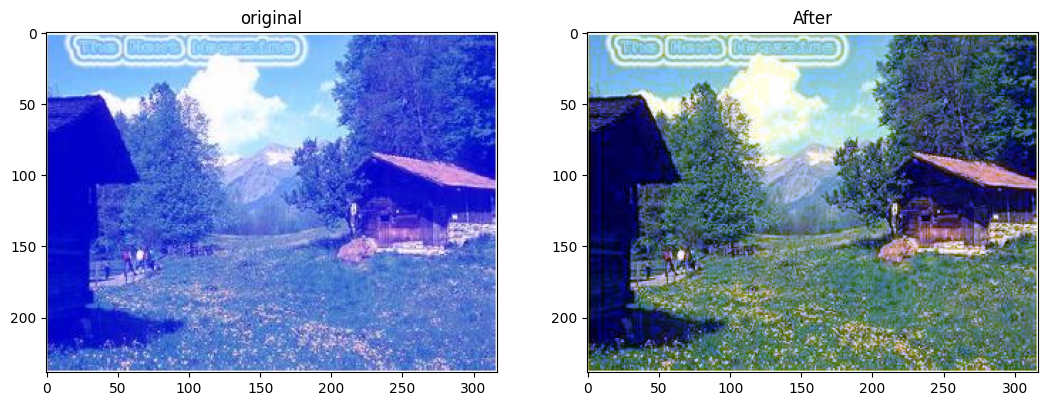

In [7]:
def eliminateBlueEffect(img):
	copy = np.copy(img)
	copy[:, :, 2] = equalize_hist(copy[:,:,2], nbins=256) * 255
	show_images([img, copy], ["original", "After"])


blue = io.imread("./1.jpg")
eliminateBlueEffect(blue)

blue = io.imread("./2.jpg")
eliminateBlueEffect(blue)
